## Analysing difference of Grid cell activation as a fucntion of distance

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def Lattice(l=1,l0=[0,0],t0=0,N=3):
    '''Return an array of x coordinates and y coordinates that create a hexagonal lattice
      of N^2 points of length l, rotated by theta t0 and displaced by l0  '''
    mlist = np.linspace(-N,N,2*N+1)
    nlist = np.linspace(-N,N,2*N+1)
    m,n = np.meshgrid(mlist,nlist)
    a0 = np.array([(3**0.5)/2,1/2]) *l
    b0 = np.array([(3**0.5)/2,-1/2]) *l
    # a = a0 + *l + l0[0]
    # b = np.array([3**0.5/2,-1/2]) *l + l0[1]

    # apply rotation
    theta = np.radians(t0)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    a,b = R@a0 + l0[0], R@b0 + l0[1]
    return np.outer(a,m.flatten()) + np.outer(b,n.flatten())

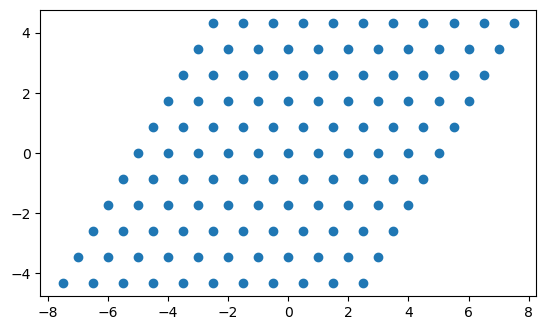

In [4]:
plt.scatter(*Lattice(l=1,t0=30,N=5))
# plt.set_aspect('equal', adjustable='box')
plt.axis('scaled')
plt.show()

The normal Gaussian is given by,
$$ \displaystyle g(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}\exp \left(-{\frac {1}{2}}{\frac {(x-\mu )^{2}}{\sigma ^{2}}}\right) $$

In [5]:
def GaussLattice(x,y,X,Y,s=1):
    ''' A function with periodic Gaussians centered at X,Y lattice'''
    exponent = (np.subtract.outer(X,x))**2  + (np.subtract.outer(Y,y))**2
    # print(exponent.shape)
    explat = np.exp(exponent / (-2*(s**2)))     # lattice of exponentials
    return np.sum(explat, axis=0)

In [11]:
X1,Y1 = Lattice(l=1,t0=0,N=10)
X2,Y2 = Lattice(l=1,t0=3,N=10)
X3,Y3 = Lattice(l=1,t0=10,N=10)

# print(X.shape,Y.shape)
xyrange = np.linspace(-5,5,100)
x,y = np.meshgrid(xyrange,xyrange)
Z1 = GaussLattice(x,y,X1,Y1,s=0.2)
Z2 = GaussLattice(x,y,X2,Y2,s=0.2)
Z3 = GaussLattice(x,y,X3,Y3,s=0.2)

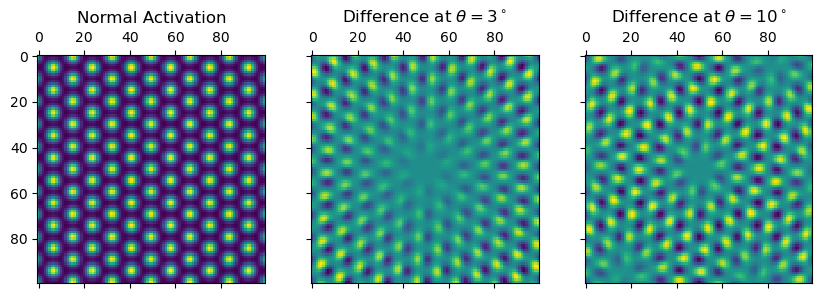

In [29]:
fig, ax = plt.subplots(1,3, figsize=(10,30), sharex=True, sharey=True)

ax[0].matshow(Z1)
ax[0].set_title("Normal Activation")

ax[1].matshow(Z2-Z1)
ax[1].set_title(r"Difference at $\theta=3^\circ$")

ax[2].matshow(Z3-Z1)
ax[2].set_title(r"Difference at $\theta=10^\circ$")

plt.show()

In [76]:
def show_theta_var(t=0,t0=0,ax=0):
    '''Plots the variation of grid rsponse along the theta=t angle when 
    the grids have a difference in theta of t0'''
    r = np.linspace(-15,15,100)
    theta = np.radians(t)
    x = r*np.cos(theta)
    y = r*np.sin(theta)

    X1,Y1 = Lattice(l=1,t0=0,N=10)
    X2,Y2 = Lattice(l=1,t0=t0,N=10)
    # X3,Y3 = Lattice(l=1,t0=10,N=10)

    Z1 = GaussLattice(x,y,X1,Y1,s=0.2)
    Z2 = GaussLattice(x,y,X2,Y2,s=0.2)

    if ax!=0:
        ax.plot(r,Z1-Z2)
        ax.set_title(r"Diff of grid activity along $\theta=$" +f"{t}" +r"$^\circ$ with $\Delta\theta=$" +f"{t0}" +r"$^\circ$")
    else:
        plt.plot(r,Z1-Z2)
        plt.title(r"Diff of grid activity along $\theta=$" +f"{t}" +r"$^\circ$ with $\Delta\theta=$" +f"{t0}" +r"$^\circ$")
    # Z3 = GaussLattice(x,y,X3,Y3,s=0.2)

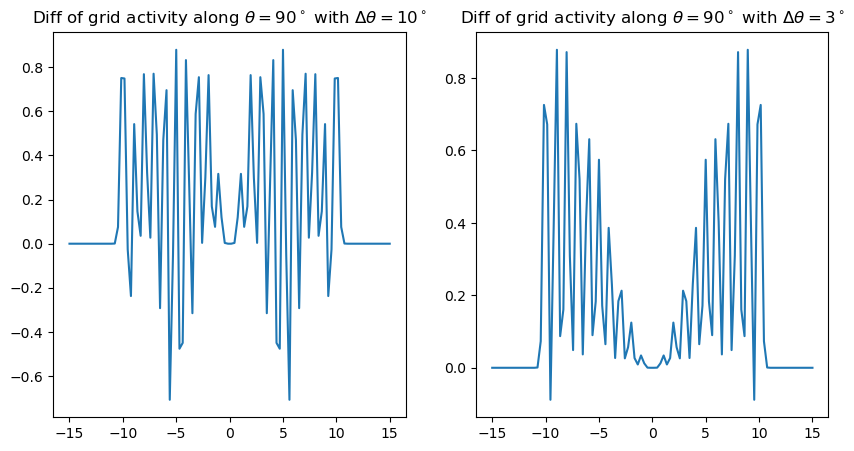

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
show_theta_var(90,10, ax[0])
show_theta_var(90,3, ax[1])
plt.show()